In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [23]:
team_name = df['Team1'].unique()

16

In [5]:
mapping = {'2020/21': '2020', '2009/10': '2010', '2007/08': '2008'}
Short_Name = {'Rajasthan Royals':'RR','Royal Challengers Bangalore':'RCB',
       'Sunrisers Hyderabad':'SRH', 'Delhi Capitals':'DC', 'Chennai Super Kings':'CSK',
       'Gujarat Titans':'GT', 'Lucknow Super Giants':'LSG', 'Kolkata Knight Riders':'KKR',
        'Mumbai Indians':'MI', 'Kings XI Punjab':'K11P',
         'Gujarat Lions':'GL', 'Pune Warriors':'PW', 'Deccan Chargers':'DC',
        'Rising Pune Supergiant':'RPS','Rising Pune Supergiants':'RPS',
        "Delhi Daredevils": 'DD','Punjab Kings':'Pnb Kings','Kochi Tuskers Kerala':'KTK',}
df['Season'] = df['Season'].replace(mapping)
df[['Team1','Team2','TossWinner','WinningTeam']]= df[['Team1','Team2','TossWinner','WinningTeam']].replace(Short_Name)

In [6]:
df['Season'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008'],
      dtype=object)

In [8]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,RR,GT,"Narendra Modi Stadium, Ahmedabad",RR,bat,N,GT,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,RCB,RR,"Narendra Modi Stadium, Ahmedabad",RR,field,N,RR,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,RCB,LSG,"Eden Gardens, Kolkata",LSG,field,N,RCB,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,RR,GT,"Eden Gardens, Kolkata",GT,field,N,GT,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,SRH,Pnb Kings,"Wankhede Stadium, Mumbai",SRH,bat,N,Pnb Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


   ##  No of trophy won by each team who wins the IPL

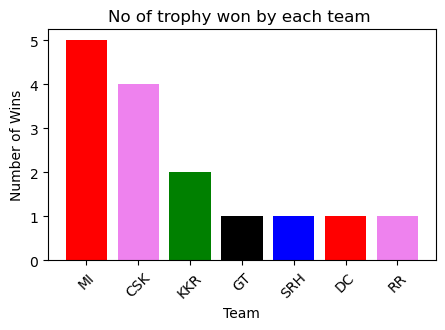

In [9]:
Final = df[df['MatchNumber']=='Final']
result = Final['WinningTeam'].value_counts()
Winner_team = result.index
No_of_trophy = result.values
plt.figure(figsize=(5,3))
plt.title("No of trophy won by each team ")
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.ylabel('Number of Wins')
plt.bar(Winner_team,No_of_trophy,width=0.8,color=['red','violet','green','black','blue'])
plt.show()
# result.index


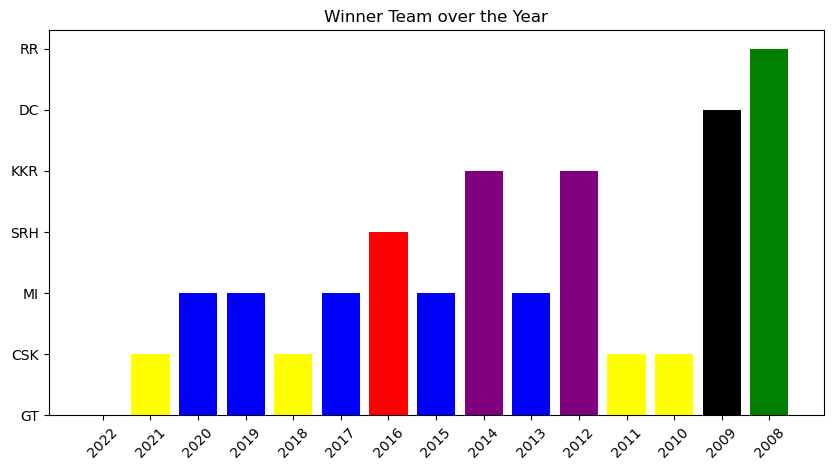

In [11]:
plt.figure(figsize=(10,5))
team_colors = {'GT': 'orange', 'SRH': 'red', 'MI': 'blue','KKR':'purple','CSK':'yellow','DC':'black','RR':'green'}
plt.title("Winner Team over the Year")
plt.bar(Final['Season'],Final['WinningTeam'],color=[team_colors[team] for team in Final['WinningTeam']])
plt.xticks(rotation=45)
plt.show()

###  Matches in 2008 

In [85]:
Matches_in_2008 = df[(df['Season']=='2008')]
Matches_in_2008_without_final = Matches_in_2008[~Matches_in_2008['MatchNumber'].isin(['Final','Semi Final'])]
result_2008 = Matches_in_2008_without_final['WinningTeam'].value_counts()
result_2008

WinningTeam
RR      11
K11P    10
CSK      8
MI       7
DD       7
KKR      6
RCB      4
DC       2
Name: count, dtype: int64

#  No of matches won by each team in 2008 excluding final and semifinal

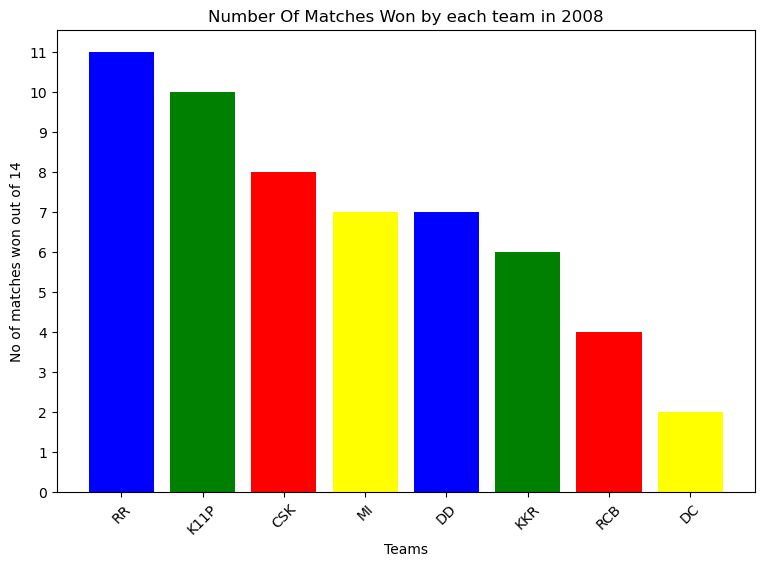

In [14]:
Teams = result_2008.index
No_of_Matches_won = result_2008.values
plt.figure(figsize=(9,6))
plt.title("Number Of Matches Won by each team in 2008")
plt.xlabel('Teams')
plt.ylabel('No of matches won out of 14')
colors = ['blue','green','red','yellow']
y_range = list(range(12))
plt.yticks(y_range)
plt.bar(Teams,No_of_Matches_won,color=colors)
plt.xticks(rotation=45)
plt.show()

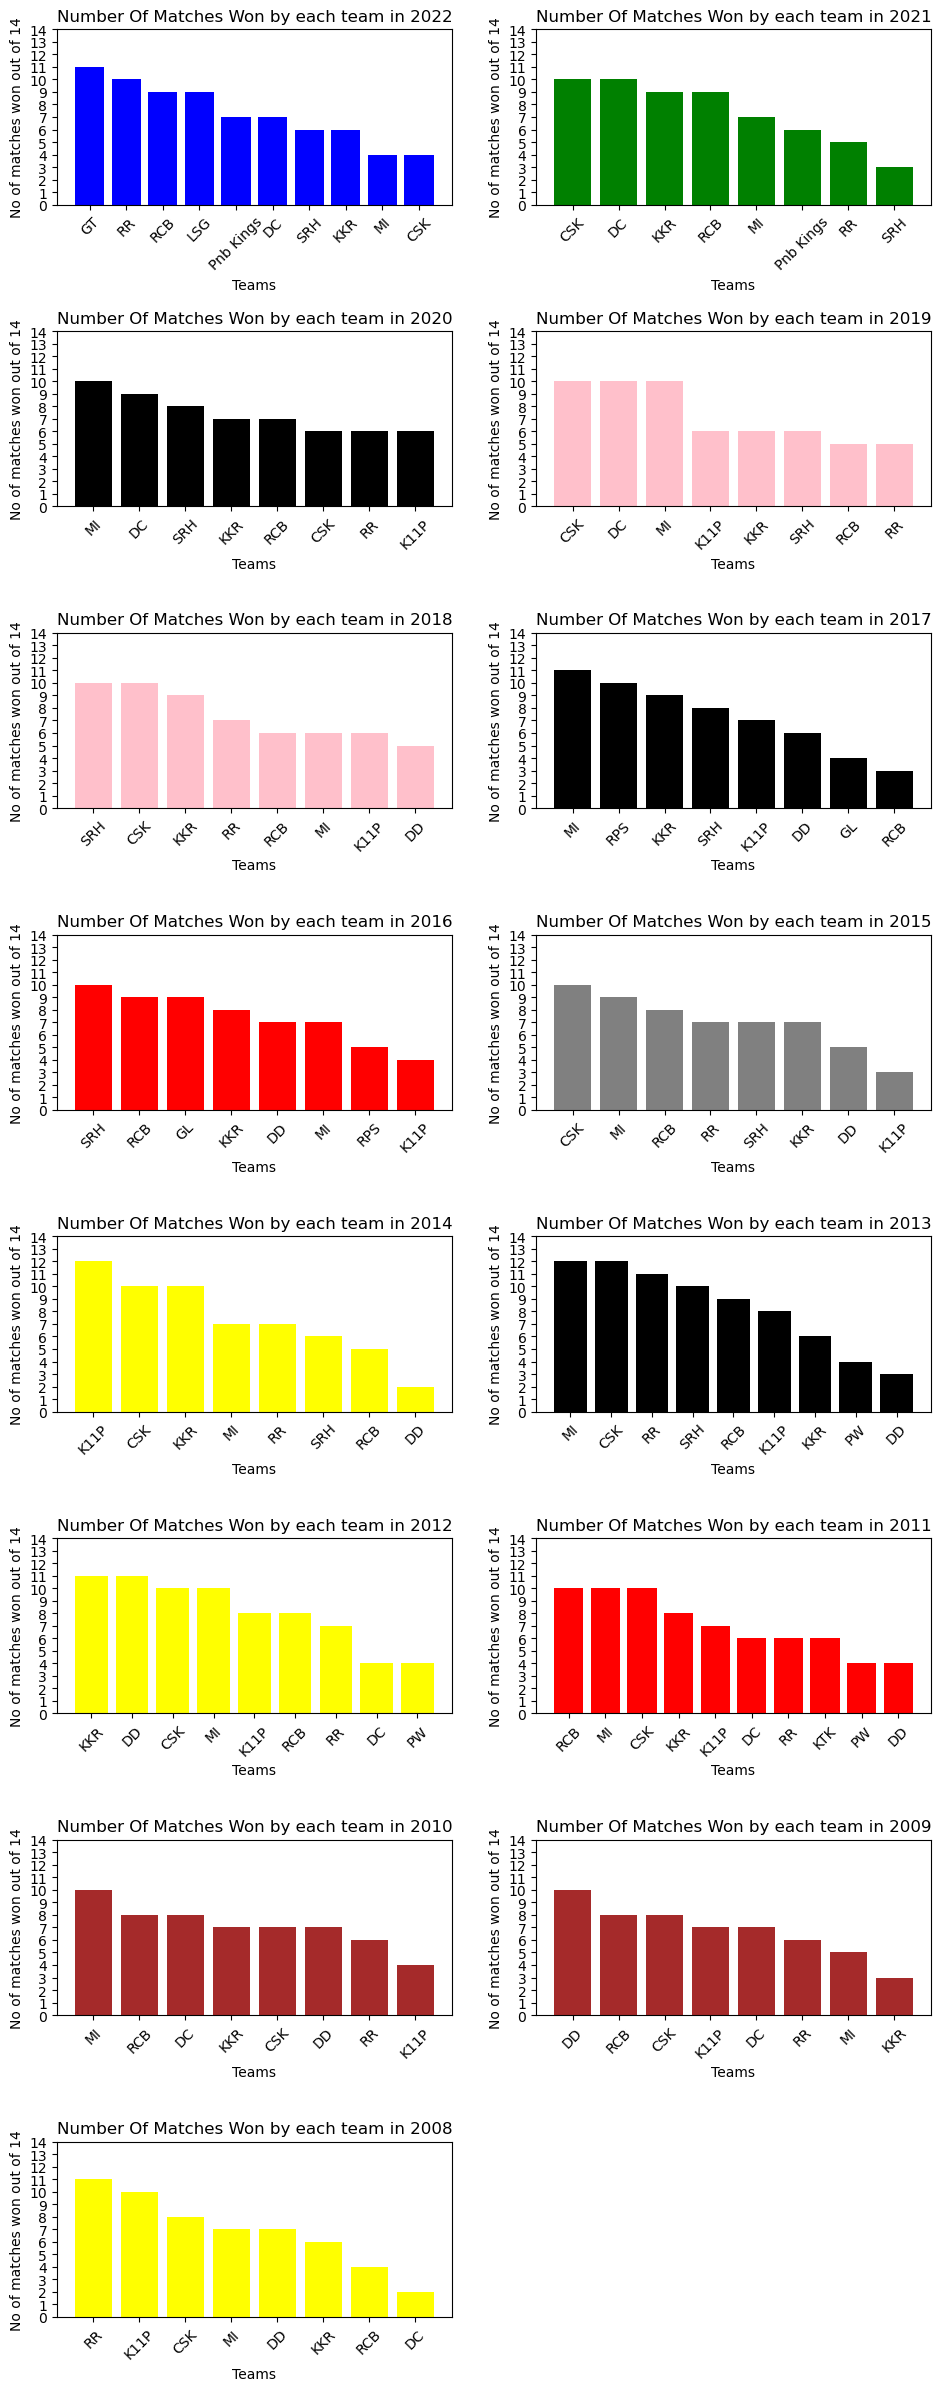

In [86]:
import random

unique_years = df['Season'].unique()

# Calculate the number of rows needed for the grid
num_rows = len(unique_years) // 2
if len(unique_years) % 2 != 0:
    num_rows += 1

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3 * num_rows))
fig.tight_layout(pad=3.0,h_pad=7.0)  # Adjust the padding as needed

# Iterate through the unique years and create a subplot for each
for i, year in enumerate(unique_years, start=1):
    matches_in_year = df[df['Season'] == year]
    matches_in_year_without_final = matches_in_year[~matches_in_year['MatchNumber'].isin(['Final', 'Semi Final'])]
    result_year = matches_in_year_without_final['WinningTeam'].value_counts()
    teams = result_year.index
    no_of_matches_won = result_year.values

    # Calculate the position in the subplot grid
    row = (i - 1) // 2
    col = (i - 1) % 2
    # Providing custom range for y axis to make the graph more readable and different colors
    custom_range = list(range(15))
    colors = ['blue','green','red','yellow','orange','brown','pink','grey','black']
    # Plotting Bar graph for each year 
    axes[row, col].bar(teams, no_of_matches_won, color=colors[random.randint(0, 8)])
    axes[row, col].set_title(f"Number Of Matches Won by each team in {year}")
    axes[row, col].set_xticks(range(len(teams)))
    axes[row, col].set_xticklabels(teams, rotation=45)
    axes[row, col].set_xlabel('Teams')
    axes[row, col].set_ylabel('No of matches won out of 14')
    axes[row, col].set_yticks(custom_range)

    
# Here I was getting one extra plot in 7th row and 1st column so in order to delete that extra plot I've used delaxes(deleteaxes)
if len(unique_years) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1]) 

# Show the plot
plt.show()


In [114]:
def who_won_match(team1,team2)->(None):
    # creating separate dataframe of both team's data
    df_team1_team2 = df[(df['Team1']==team1) & (df['Team2']==team2) | (df['Team1']==team2) & (df['Team2'] == team1)]
    Match_Between_team1_team2 = df_team1_team2['WinningTeam'].value_counts()
    # checking whether both the teams have played any match or not 
    if(len(Match_Between_team1_team2) == 0):
        print(f"Both team {team1} and {team2} have not played any match till 2022 ")
    else:
        #extracting data and plotting Pie Chart
        number_of_matches_won = Match_Between_team1_team2.values
        total_number_of_matches_played = number_of_matches_won.sum()
        plt.text(0,1.2, f'Total Matches Played: {total_number_of_matches_played}', ha='center', va='center',fontsize=10)
        team_name = Match_Between_team1_team2.index
        plt.title(f"Match between {team1} and {team2} from 2008 to 2022 ")
        plt.pie(number_of_matches_won,labels=team_name,autopct=lambda p : '{:.0f}'.format(p * sum(number_of_matches_won) / 100))
        plt.legend()
        plt.show()
    

In [115]:
def Check_Who_Won_Match()->(None):
    print("Choose name from the list of Teams : ",team_name)
    team1 = input("Enter the name Abbreviation of Team1 : ").strip().upper()
    team2 = input("Enter the name Abbreviation of Team1 : ").strip().upper()
    who_won_match(team1,team2)